In [5]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


/home/xcite/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rec', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


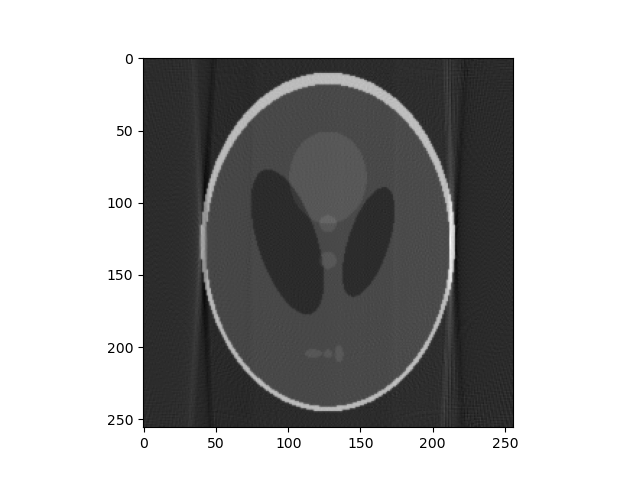

In [8]:
import astra
import numpy as np

vol_geom = astra.create_vol_geom(256, 256)

ratio = 256/160

proj_geom = astra.create_proj_geom('fanflat', ratio*0.784, 512, np.linspace(0,np.pi,180,False),ratio*1000,ratio*520)

# As before, create a sinogram from a phantom
import scipy.io
P = scipy.io.loadmat('/home/xcite/astra-toolbox/samples/python/phantom.mat')['phantom256']
proj_id = astra.create_projector('strip_fanflat',proj_geom,vol_geom)
sinogram_id, sinogram = astra.create_sino(P, proj_id)

import pylab

# Create a data object for the reconstruction
rec_id = astra.data2d.create('-vol', vol_geom)

# create configuration 
cfg = astra.astra_dict('FBP_CUDA')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['option'] = { 'FilterType': 'Ram-Lak' }

# Create and run the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)
astra.algorithm.run(alg_id)

# Get the result
rec = astra.data2d.get(rec_id)
pylab.figure()
pylab.imshow(rec)
pylab.show()

# Clean up. Note that GPU memory is tied up in the algorithm object,
# and main RAM in the data objects.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)

In [9]:
import astra
import numpy as np

vol_geom = astra.create_vol_geom(256, 256)

ratio = 256/160

proj_geom = astra.create_proj_geom('fanflat', ratio*0.784, 512, np.linspace(0,np.pi,180,False),ratio*1000,ratio*520)

# As before, create a sinogram from a phantom
import scipy.io
P = scipy.io.loadmat('/home/xcite/astra-toolbox/samples/python/phantom.mat')['phantom256']
proj_id = astra.create_projector('strip_fanflat',proj_geom,vol_geom)
sinogram_id, sinogram = astra.create_sino(P, proj_id)

import pylab

# Create a data object for the reconstruction
rec_id = astra.data2d.create('-vol', vol_geom)

# create configuration 
cfg = astra.astra_dict('FBP')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['option'] = { 'FilterType': 'Ram-Lak' }

# Create and run the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)
astra.algorithm.run(alg_id)

# Get the result
rec = astra.data2d.get(rec_id)
pylab.figure()
pylab.imshow(rec)
pylab.show()

# Clean up. Note that GPU memory is tied up in the algorithm object,
# and main RAM in the data objects.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)

Exception: Unable to initialize Algorithm.